In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import pandas as pd
import numpy as np
from solardatatools import DataHandler
from pathlib import Path

In [8]:
fp = Path('..') / "data_transforms" / "timeseries.csv"
fp

PosixPath('../data_transforms/timeseries.csv')

In [9]:
df = pd.read_csv(fp, index_col=0, parse_dates=True)

In [10]:
dh = DataHandler(df)

In [11]:
dh.run_pipeline(verbose=True)


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.26it/s]



total time: 5.56 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              0.42s
Cleaning                   0.02s
Filtering/Summarizing      5.11s
    Data quality           0.02s
    Clear day detect       0.03s
    Clipping detect        4.54s
    Capacity change detect 0.53s



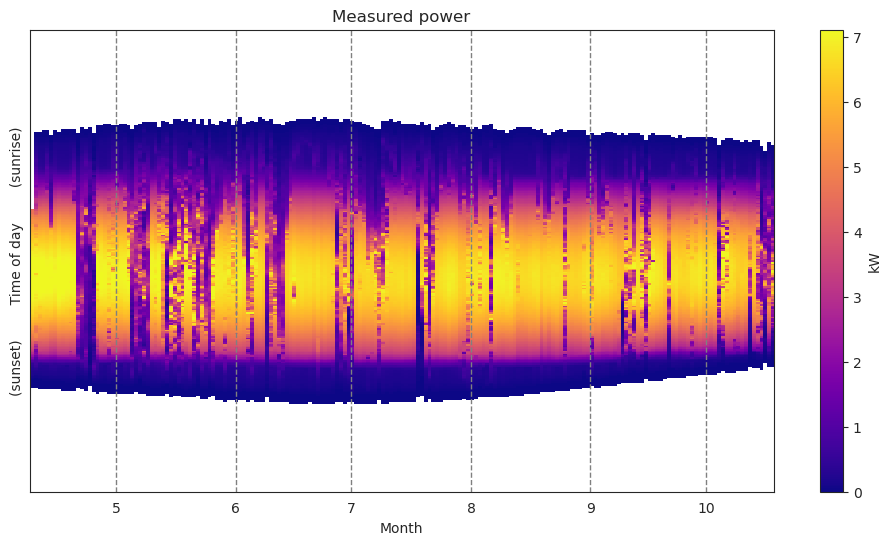

In [12]:
dh.plot_heatmap('raw');

In [15]:
dh.report()


-----------------
DATA SET REPORT
-----------------
length               0.53 years
capacity estimate    6.75 kW
data sampling        5 minutes
quality score        0.99
clearness score      0.49
inverter clipping    True
clipped fraction     0.12
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            


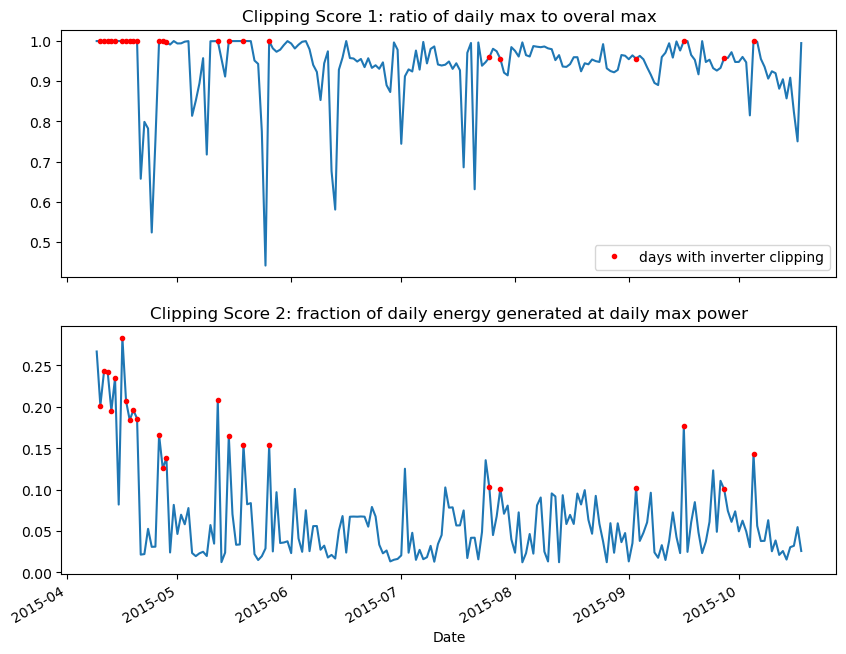

In [17]:
dh.plot_clipping();

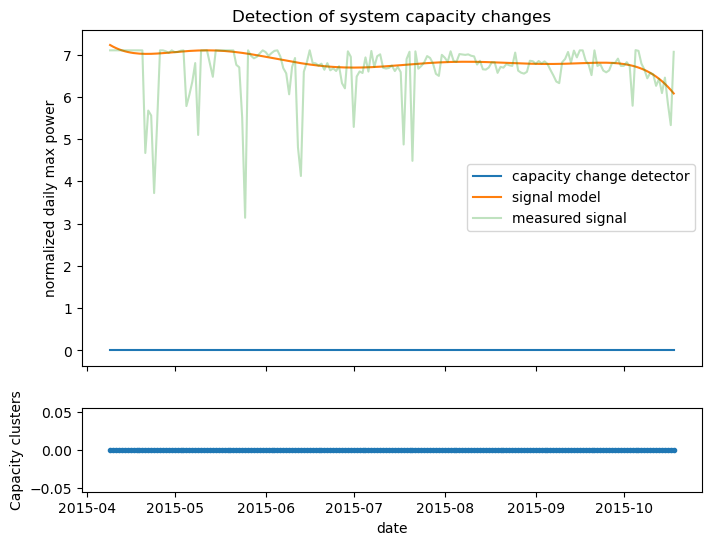

In [16]:
dh.plot_capacity_change_analysis();

In [14]:
fixtures = {
    "clipping_1.csv": dh.daily_scores.clipping_1,
    "clipping_2.csv": dh.daily_scores.clipping_2,
    "density.csv": dh.daily_scores.density,
    "linearity.csv": dh.daily_scores.linearity,
    "quality_clustering.csv": dh.daily_scores.quality_clustering
}
fixtures

{'clipping_1.csv': array([0.99923996, 0.99926808, 0.99929627, 0.99919774, 0.99918365,
        0.9993103 , 0.99932439, 0.99922587, 0.99926808, 0.99954957,
        0.99918365, 0.99908512, 0.65737211, 0.79867692, 0.78216626,
        0.52396371, 0.75159411, 0.99919774, 0.99922587, 0.99591811,
        0.9906538 , 0.99923996, 0.99330005, 0.99362376, 0.99781834,
        0.99914143, 0.81370966, 0.85096773, 0.89422202, 0.95681612,
        0.71750299, 0.99881766, 0.9989725 , 0.99921177, 0.95556337,
        0.91122533, 0.99916955, 0.99921177, 0.99900069, 0.99916955,
        0.99942292, 0.99933849, 0.99911324, 0.95096071, 0.94261389,
        0.77480473, 0.44180449, 0.99929627, 0.98115283, 0.97273561,
        0.97781689, 0.98931669, 0.99915546, 0.99324374, 0.98081503,
        0.99021747, 0.99756497, 0.99916955, 0.97880217, 0.93998174,
        0.92261244, 0.85283977, 0.94403551, 0.97376312, 0.67634599,
        0.58084311, 0.9280597 , 0.95832224, 0.99932439, 0.95716801,
        0.95595755, 0.9483989 

In [20]:
for key, val in fixtures.items():
    np.savetxt(key, val, delimiter=',')